In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix,classification_report

In [2]:
df=pd.read_csv("1.csv")
df.head()

,id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


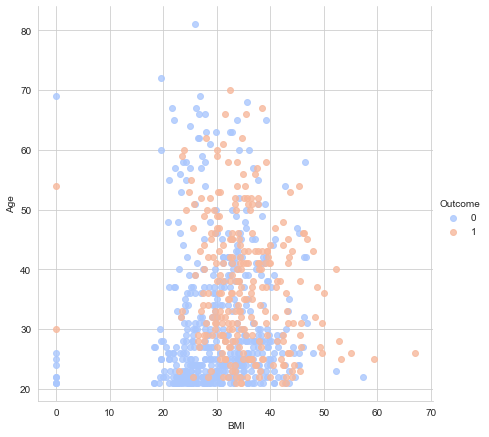

In [3]:
sns.set_style('whitegrid')
sns.lmplot('BMI','Age',data=df, hue='Outcome',
           palette='coolwarm',height=6,aspect=1,fit_reg=False)

In [4]:
kmeans=KMeans(n_clusters=2)
kmeans.fit(df)

KMeans(n_clusters=2)

In [5]:
kmeans.cluster_centers_

array([[1.92000000e+02, 3.99738903e+00, 1.21140992e+02, 6.90287206e+01,
        2.03080940e+01, 8.04882507e+01, 3.22013055e+01, 4.83976501e-01,
        3.31671018e+01, 3.78590078e-01],
       [5.76000000e+02, 3.69350649e+00, 1.20649351e+02, 6.91818182e+01,
        2.07636364e+01, 7.91142857e+01, 3.17849351e+01, 4.59838961e-01,
        3.33142857e+01, 3.19480519e-01]])

In [6]:
def converter(cluster):
    if cluster=='Yes':
        return 1
    else:
        return 0
df['Cluster'] = df['Outcome'].apply(converter)
df.head()

,id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Cluster
0,1,6,148,72,35,0,33.6,0.627,50,1,0
1,2,1,85,66,29,0,26.6,0.351,31,0,0
2,3,8,183,64,0,0,23.3,0.672,32,1,0
3,4,1,89,66,23,94,28.1,0.167,21,0,0
4,5,0,137,40,35,168,43.1,2.288,33,1,0


In [7]:
print("Confusion Matrix: \n" ,confusion_matrix(df['Cluster'],kmeans.labels_))
print(classification_report(df['Cluster'],kmeans.labels_))

Confusion Matrix: 
 [[383 385]
 [  0   0]]
              precision    recall  f1-score   support

           0       1.00      0.50      0.67       768
           1       0.00      0.00      0.00         0

    accuracy                           0.50       768
   macro avg       0.50      0.25      0.33       768
weighted avg       1.00      0.50      0.67       768



C:\Users\Hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
